In [59]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras import optimizers
import tensorflow as tf
import numpy as np
from glob import glob
import os
import matplotlib.pyplot as plt
from datetime import datetime
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
from tqdm import tqdm

In [60]:
IMAGE_SIZE = [224, 224]
# batch_size = 32
batch_size = 32
numOfEpochs = 100
optimizer = tf.keras.optimizers.Adam()
# optimizer = tf.keras.optimizers.Adam(learning_rate=0.07)
# optimizer = tf.keras.optimizers.RMSprop()

In [61]:
#Give dataset path
# train_path = r'C:\Users\Ezazr\Desktop\UNet-TF-new\Classification-Dataset - Augmented\train'
# test_path = r'C:\Users\Ezazr\Desktop\UNet-TF-new\Classification-Dataset - Augmented\test'
# validation_path = r'C:\Users\Ezazr\Desktop\UNet-TF-new\Classification-Dataset - Augmented\validation'
train_path = r'C:\Users\Ezazr\Desktop\UNet-TF-new\Classification-Dataset - Cross Validation 4 fold\Fold 4\train'
test_path = r'C:\Users\Ezazr\Desktop\UNet-TF-new\Classification-Dataset - Cross Validation 4 fold\Fold 4\test'
validation_path = r'C:\Users\Ezazr\Desktop\UNet-TF-new\Classification-Dataset - Cross Validation 4 fold\Fold 4\validation'

In [62]:
vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [63]:
vgg.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_3')>

In [64]:
for layer in vgg.layers:
  layer.trainable = False

In [65]:
folders = glob(train_path + '/*')
print(len(folders))

2


In [66]:
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [67]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [68]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [69]:
validation_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [70]:
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [71]:
train_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical')

Found 714 images belonging to 2 classes.


In [72]:
validation_set = validation_datagen.flow_from_directory(validation_path,
                                                 target_size = (224, 224),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical')

Found 88 images belonging to 2 classes.


In [73]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = batch_size,
                                            class_mode = 'categorical',
                                            shuffle=False)

Found 107 images belonging to 2 classes.


In [74]:

es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)


model_history=model.fit(
  train_set,
  validation_data=validation_set,
  epochs=numOfEpochs,
  steps_per_epoch=5,
#   validation_steps=32,
  batch_size=batch_size,
#   callbacks=[es],
  verbose=2)



Epoch 1/100
5/5 - 180s - loss: 2.7009 - accuracy: 0.6062 - val_loss: 1.6473 - val_accuracy: 0.7955 - 180s/epoch - 36s/step
Epoch 2/100
5/5 - 227s - loss: 2.1538 - accuracy: 0.7188 - val_loss: 1.2600 - val_accuracy: 0.8068 - 227s/epoch - 45s/step
Epoch 3/100
5/5 - 186s - loss: 2.0523 - accuracy: 0.7826 - val_loss: 0.9521 - val_accuracy: 0.8977 - 186s/epoch - 37s/step
Epoch 4/100
5/5 - 180s - loss: 1.1593 - accuracy: 0.8750 - val_loss: 1.6718 - val_accuracy: 0.7955 - 180s/epoch - 36s/step
Epoch 5/100
5/5 - 176s - loss: 0.9834 - accuracy: 0.8938 - val_loss: 1.0975 - val_accuracy: 0.8864 - 176s/epoch - 35s/step
Epoch 6/100
5/5 - 165s - loss: 1.1582 - accuracy: 0.8438 - val_loss: 0.9685 - val_accuracy: 0.9091 - 165s/epoch - 33s/step
Epoch 7/100
5/5 - 160s - loss: 0.8240 - accuracy: 0.9062 - val_loss: 0.9699 - val_accuracy: 0.8750 - 160s/epoch - 32s/step
Epoch 8/100
5/5 - 157s - loss: 0.9850 - accuracy: 0.8750 - val_loss: 0.5154 - val_accuracy: 0.9432 - 157s/epoch - 31s/step
Epoch 9/100
5/5 

Epoch 68/100
5/5 - 154s - loss: 0.4773 - accuracy: 0.9563 - val_loss: 0.6005 - val_accuracy: 0.9545 - 154s/epoch - 31s/step
Epoch 69/100
5/5 - 137s - loss: 0.2911 - accuracy: 0.9565 - val_loss: 0.4815 - val_accuracy: 0.9432 - 137s/epoch - 27s/step
Epoch 70/100
5/5 - 160s - loss: 0.4922 - accuracy: 0.9375 - val_loss: 0.3358 - val_accuracy: 0.9773 - 160s/epoch - 32s/step
Epoch 71/100
5/5 - 152s - loss: 0.1626 - accuracy: 0.9812 - val_loss: 0.2922 - val_accuracy: 0.9659 - 152s/epoch - 30s/step
Epoch 72/100
5/5 - 162s - loss: 0.1447 - accuracy: 0.9875 - val_loss: 0.3862 - val_accuracy: 0.9659 - 162s/epoch - 32s/step
Epoch 73/100
5/5 - 165s - loss: 0.8390 - accuracy: 0.9375 - val_loss: 0.2977 - val_accuracy: 0.9545 - 165s/epoch - 33s/step
Epoch 74/100
5/5 - 167s - loss: 0.5283 - accuracy: 0.9500 - val_loss: 0.0654 - val_accuracy: 0.9886 - 167s/epoch - 33s/step
Epoch 75/100
5/5 - 174s - loss: 0.1213 - accuracy: 0.9875 - val_loss: 0.3221 - val_accuracy: 0.9886 - 174s/epoch - 35s/step
Epoch 76

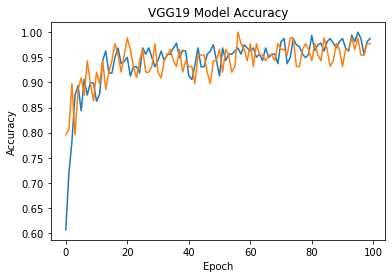

In [75]:
_# Plot training & validation loss values
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
# plt.plot(model_history.history['loss'])
plt.title('VGG19 Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
# plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()


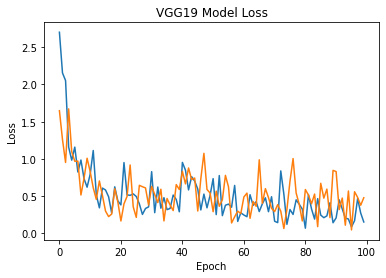

In [76]:
_# Plot training & validation loss values
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('VGG19 Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
# plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

In [77]:
result = model.evaluate(test_set)
print("test_loss, test accuracy",result)

4/4 [==============================] - 73s 17s/step - loss: 0.1914 - accuracy: 0.9720
test_loss, test accuracy [0.1913522183895111, 0.9719626307487488]


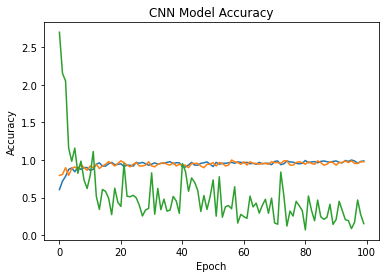

In [78]:
_# Plot training & validation loss values
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.plot(model_history.history['loss'])
plt.title('CNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
# plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()


In [79]:
# epochs = list(range(0,numOfEpochs))
# plt.plot(model_history.history['accuracy'])
# plt.plot(epochs)
# plt.title('CNN Model accuracy values')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()

In [80]:
# epochs = list(range(0,numOfEpochs))
# plt.plot(model_history.history['loss'])
# plt.plot(epochs)
# plt.title('CNN Model loss values')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()

In [81]:
resss = model.predict(test_set)
print(np.array(tf.argmax(resss, axis=1)))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [82]:
from sklearn.metrics import roc_curve, auc
import glob

Aedes_Count = 0;
test_labels = []
#for directory_path in glob.glob("cell_images/test/*"): 
for directory_path in glob.glob(test_path + "/*"):
    label = directory_path.split("\\")[-1]
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        if(label == 'Aedes'):
            Aedes_Count = Aedes_Count + 1;
            test_labels.append(0)
        else:
            test_labels.append(1)
        
test_labels = np.array(test_labels)

In [83]:
def get_datalevel2():
    datalevel= []
    for i in range(len(test_labels)):
        if(i < Aedes_Count):
            datalevel.append([1,0])
        else:
            datalevel.append([0,1])
    return np.array(datalevel)


In [84]:
testdataLevels = get_datalevel2()
# print(testdataLevels)
y_score = model.predict(test_set)
# preds = y_score[:,1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(testdataLevels[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

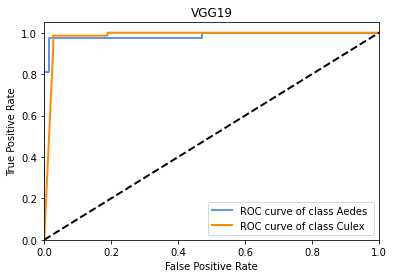

In [85]:
colors = ["cornflowerblue", "darkorange"]
classes = ['Aedes','Culex']

plt.figure()
lw = 2
for i in range(2):
    plt.plot(
        fpr[i],
        tpr[i],
        color=colors[i],
        lw=lw,
        label="ROC curve of class {0} ".format(classes[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("VGG19")
plt.legend(loc="lower right")
plt.show()

In [86]:
roc_auc

{0: 0.984942084942085, 1: 0.9832046332046332}

In [87]:
from sklearn import metrics

test_labels_predict = [];
for i in range(len(y_score)):
    if(y_score[i][0] > y_score[i][1]):
        test_labels_predict.append(0)
    else:
        test_labels_predict.append(1)
        
test_labels_predict = np.array(test_labels_predict)

# confusion_matrix
confusion = metrics.confusion_matrix(test_labels, test_labels_predict)
print(confusion)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
SPC = TN / float(TN+FP)
TPR = TP / float(TP+FN)
print('\nSPC = ', SPC, '\nTPR = ', TPR)

[[34  3]
 [ 1 69]]

SPC =  0.918918918918919 
TPR =  0.9857142857142858


In [88]:
model.save('VGG19-4.h5')